## P1:  Max-Cut Problem

We will guide you through the design of a factor-2 approximation algorithm for the Max-Cut problem. You are given an undirected  graph $G$ with $n$ vertices and $m$ edges. 

The maxcut problem asks you to partition the vertices into two subsets $S^+$ and $S^-$ such that the total number of edges crossing the cut is as large as possible.
$$ \mathsf{max}\ \left| \left\{ (i,j) \in E\ |\ i \in S^+,\ j \in S^-,\ S^+ \cap S^- = \emptyset, S^+ \cup S^- = V \right\} \right|$$



### Example

Consider the graph below: 



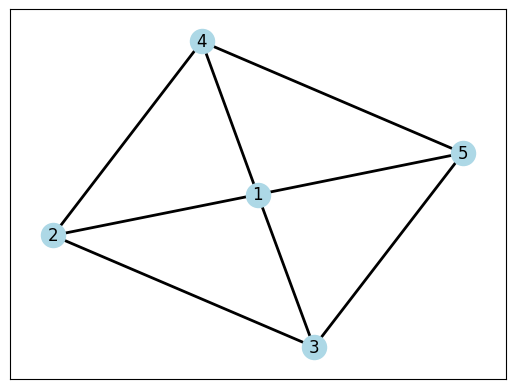

In [1]:
import networkx as nx
from matplotlib import pyplot as plt

def draw_graph(n, edge_list, node_set_flag, set1_color='lightblue', set2_color='red'):
    # get the list of nodes in various sets and edges that are cut and uncut
    set1_nodes = [i for i in range(1, n+1) if node_set_flag[i-1] == True]
    set2_nodes = [i for i in range(1, n+1) if node_set_flag[i-1] == False]
    edge_list_not_cut = [(i,j) for (i,j) in edge_list if node_set_flag[i-1] == node_set_flag[j-1] ]
    edge_list_cut = [(i,j) for (i,j) in edge_list if node_set_flag[i-1] != node_set_flag[j-1] ]
    # now draw the graph
    G = nx.Graph()
    G.add_edges_from(edge_list)
    pos = nx.spring_layout(G, seed=1234)
    plt.figure()
    nx.draw_networkx_nodes(G, pos, nodelist=set1_nodes, node_color=set1_color)
    if len(set2_nodes) >= 1:
        nx.draw_networkx_nodes(G, pos, nodelist=set2_nodes, node_color=set2_color, alpha=0.5)

    labels = {i:i for i in range(1, n+1)}
    nx.draw_networkx_labels(G, pos,  labels=labels)

    nx.draw_networkx_edges(G, pos, width=2, edgelist = edge_list_not_cut)
    nx.draw_networkx_edges(G, pos, width=2, edgelist = edge_list_cut, edge_color='red')
    plt.show()


n = 5
edges = [(1,2),(1,3),(1,4),(1,5), (2,3),(2,4),(3,5),(4,5)]
node_set_flag = [True, True, True, True, True] # all nodes are in set1
draw_graph(5, edges, node_set_flag)


We would like to partition the set $\{ 1, \ldots, 5 \}$ into two subsets $S_1, S_2$ so that the number of edges going from a vertex in $S_1$ to a vertex in $S_2$ is as large as possible. 

#### First Cut
Suppose we set $S_1 = \{ 1, 2, 3\}$ and therefore, $S_2 = \{4, 5\}$, we have a cut with $4$ edges crossing it.

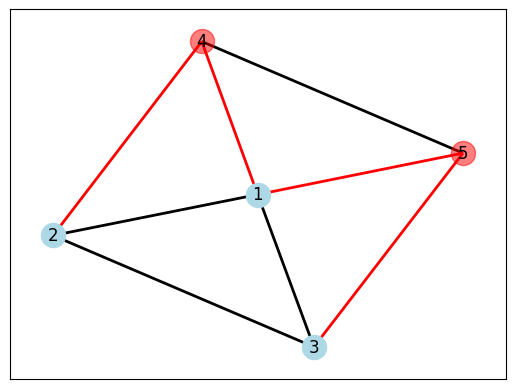

In [2]:
n = 5
edges = [(1,2),(1,3),(1,4),(1,5), (2,3),(2,4),(3,5),(4,5)]
node_set_flag = [True, True, True, False, False] # 1, 2, 3 are in set1
draw_graph(5, edges, node_set_flag)


#### Second Cut
We can do better by setting $S_1 = \{ 1,2,5\}$ and $S_2 = \{3, 4\}$ with $6$ edges crossing the cut. 

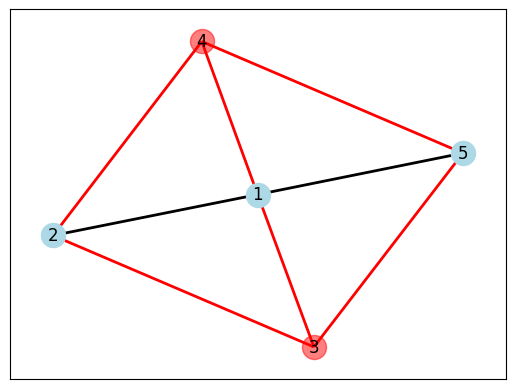

In [3]:
n = 5
edges = [(1,2),(1,3),(1,4),(1,5), (2,3),(2,4),(3,5),(4,5)]
node_set_flag = [True, True, False, False, True] # 1, 2, 5 are in set1
draw_graph(5, edges, node_set_flag)

Therefore, the MAXCUT problem asks you to find a cut with as many edges as possible crossing the cut. This problem is often encountered in applications such as circuit layout in chip design where we have a graph between the circuit components and the edges are formed by wires going between these components. 

MAXCUT is known to be NP-complete though we will not ask you to prove it here.  The goal of this problem is to design a greedy algorithm and prove an approximation guarantee.

## Greedy Algorithm 

Suppose you have a graph $G$ and we propose a partition of the vertices $S_1, S_2$. We say that a node $v$ is _imbalanced_ if it has strictly more number of edges  to other nodes within its  partition than edges crossing the cut. 

#### Examples 

As an example, consider the graphs shown above and the _first_ cut we showed above with $S_1 = \{1, 2, 3\}$ and $S_2 = \{4, 5\}$. Notice that vertices $2$ and $3$ are imbalanced.

However, if we consider the _second_ cut of the graph above, we have $S_1 = \{ 1, 2, 5\}$ and $S_2 = \{3, 4\}$ we see that all nodes are balanced in this cut.


### P1: Design a Greedy Algorithm

Design a greedy algorithm that starts from an arbitrary (random?) initial partition, detects if there are imbalanced vertices and uses that information to find a partition with a better cut.  Your algorithm should yield a partition with no imabalanced nodes in the final result.

Write down the pseudocode and prove that the algorithm terminates/find its time complexity.

__Note__ These problems are meant for you to develop your own thinking/problem solving and will not be graded due to the online nature of this class. We will be grading just the programming assignments based on test cases. The answers to select questions are given at the end of the notebook.

Final partition:
S1: {3, 4}
S2: {1, 2, 5}
Cut size: 6
Total iterations: 1


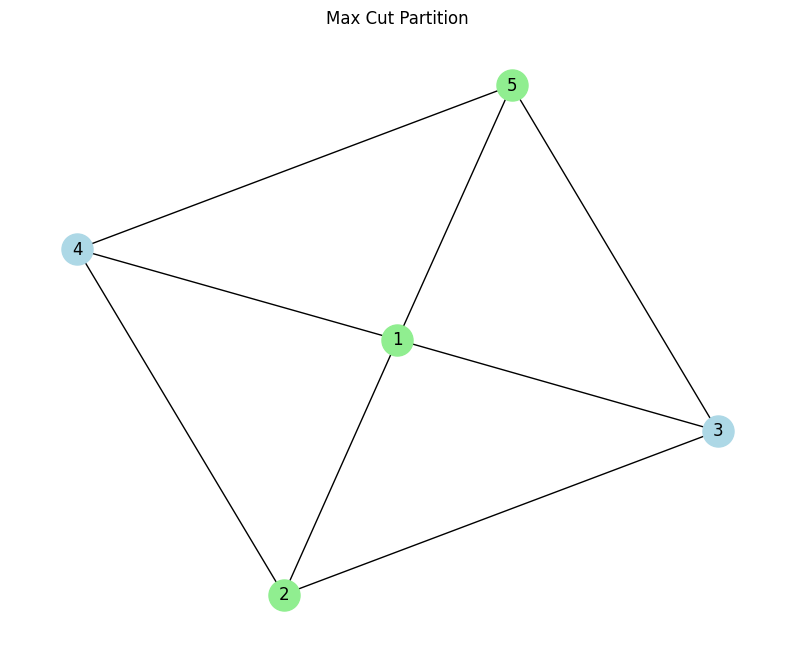

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def count_edges_within(G, node, set_nodes):
    return sum(1 for neighbor in G.neighbors(node) if neighbor in set_nodes)

def count_edges_across(G, node, other_set_nodes):
    return sum(1 for neighbor in G.neighbors(node) if neighbor in other_set_nodes)

def find_imbalanced_nodes(G, S1, S2):
    imbalanced = []
    for node in G.nodes():
        if node in S1:
            edges_within = count_edges_within(G, node, S1)
            edges_across = count_edges_across(G, node, S2)
        else:
            edges_within = count_edges_within(G, node, S2)
            edges_across = count_edges_across(G, node, S1)

        if edges_within > edges_across:
            imbalanced.append(node)
    return imbalanced

def greedy_balanced_partition(G, initial_partition=None):
    if initial_partition is None:
        # Random initial partition
        nodes = list(G.nodes())
        random.shuffle(nodes)
        mid = len(nodes) // 2
        S1, S2 = set(nodes[:mid]), set(nodes[mid:])
    else:
        S1, S2 = initial_partition

    iterations = 0
    while True:
        iterations += 1
        imbalanced_nodes = find_imbalanced_nodes(G, S1, S2)

        if not imbalanced_nodes:
            break

        for node in imbalanced_nodes:
            if node in S1:
                S1.remove(node)
                S2.add(node)
            else:
                S2.remove(node)
                S1.add(node)

        print(f"Iteration {iterations}: Moved {len(imbalanced_nodes)} nodes")

    cut_size = sum(1 for u in S1 for v in G[u] if v in S2)
    return S1, S2, cut_size, iterations

def draw_graph(G, S1, S2):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, nodelist=list(S1), node_color='lightblue', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=list(S2), node_color='lightgreen', node_size=500)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.title("Max Cut Partition")
    plt.axis('off')
    plt.show()

# Example usage
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (3,5), (4,5)])

S1, S2, cut_size, iterations = greedy_balanced_partition(G)

print(f"Final partition:")
print(f"S1: {S1}")
print(f"S2: {S2}")
print(f"Cut size: {cut_size}")
print(f"Total iterations: {iterations}")

draw_graph(G, S1, S2)


### P2:  Implement the Greedy Algorithm 

Now let's implement the greedy algorithm to find a cut of the graph with no imbalanced vertices.

The graph will be given as an `adjacency list` representation. 

  - Vertex set will be $\{0, \ldots, n-1\}$ where $n$ (the number of vertices) is a input parameter.
  - `adj_list` is an adjacency list which is given as a list of sts. For instance `adj_list[i]` for a vertex $i$ is a _set_ to all vertices connected to vertex $i$. 
     - Note that since the graph is undirected, if $j$ lies in `adj_list[i]`, we know that $i$ will be in `adjacency_list[j]`.
     - You can assume that the graph has no self loops or multiple edges between same pairs of nodes.
  - We will specify a cut as a list of $n$ boolean values `[b0, b1,...bn-1]` wherein `bi` is `True` if $i \in S_1$, and `False` if vertex $i \in S_2$.
  

Implement the overall function `find_balanced_cut` that takes a graph as input and returns a list of Booleans specifying the final cut obtained by running the greedy algorithm. Please pay attention to efficiency, we will be running some large graphs through your code and it should run within a few seconds on graphs with thousands of nodes. 

In [29]:
def find_balanced_cut(n, adj_list):
    assert n >= 1
    assert len(adj_list) == n
    # Check that the adjacency list makes sense and represents a directed graph
    for (i, neighbors) in enumerate(adj_list):
        assert all( 0 <= j < n for j in neighbors )
        assert i not in neighbors # no self loops allowed
        for j in neighbors:
            assert i in adj_list[j]

    # Start with an initial cut that places first n/2 nodes in S1 and rest in S2
    cut = [True if i < n/2 else False for i in range(n)]

    # Helper function to count edges within and across partitions
    def count_edges(node):
        within = sum(1 for neighbor in adj_list[node] if cut[neighbor] == cut[node])
        across = len(adj_list[node]) - within
        return within, across

    # Helper function to find imbalanced vertices
    def find_imbalanced_vertices():
        return [i for i in range(n) if count_edges(i)[0] > count_edges(i)[1]]

    def select_independent_set(imbalanced):
        to_flip = []
        remaining = set(imbalanced)
        while remaining:
            node = remaining.pop()
            to_flip.append(node)
            remaining -= set(adj_list[node])  # Remove neighbors
        return to_flip

    # Main loop of the greedy algorithm
    while True:
        imbalanced = find_imbalanced_vertices()
        if not imbalanced:
            break

        to_flip = select_independent_set(imbalanced)
        for node in to_flip:
            cut[node] = not cut[node]  # Flip the partition of the imbalanced node

    return cut


In [31]:
#These  are useful functions for the test cases
# IMPORTANT:
# Please ensure that you run these cells before running test cases or else you may get unknown function errors.

# Make an adjacency list out of a list of edges.
def mk_adjacency_list(n, edge_list):
    adj_list = [set() for i in range(n)]
    for (i,j) in edge_list:
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list

# Test Partition
def test_cut(n, adj_list, cut):
    num_edges_crossing_cut = [0]*n
    for (i, neighbors) in enumerate(adj_list):
        num_edges_crossing_cut[i] = sum([cut[i] != cut[j] for j in neighbors])
        if 2 * num_edges_crossing_cut[i] < len(neighbors):
                assert f'Test Failed: In your cut, vertex {i} has {len(neighbors)} edges incident on it but only {num_edges_crossing_cut[i]} edges cross the cut'
    return


In [26]:
n = 5
edge_list =  [(0,1),(0,2),(0,3),(0,4), (1,2),(1,3),(2,4),(3,4)]
adj_list = mk_adjacency_list(n, edge_list)
print(f'Adjacency list is {adj_list}')

cut = [True if i < n/2 else False for i in range(n)]
# cut = [True, True, False, False, True]
print(f'initial cut is {cut}')

def count_edges(node):
    within = sum(1 for neighbor in adj_list[node] if cut[neighbor] == cut[node])
    across = len(adj_list[node]) - within
    return within, across

print('Counting all nodes edges: ')
print('within across')
for i in range(n):
    print(count_edges(i))

imbalanced = [i for i in range(n) if count_edges(i)[0] > count_edges(i)[1]]
print(f'imbalanced nodes:{imbalanced}')

def select_independent_set(imbalanced):
    to_flip = []
    remaining = set(imbalanced)
    while remaining:
        node = remaining.pop()
        to_flip.append(node)
        remaining -= set(adj_list[node])  # Remove neighbors
    return to_flip

print(f'to_flip: {select_independent_set(imbalanced)}')

to_flip = select_independent_set(imbalanced)
for node in to_flip:
    cut[node] = not cut[node]


Adjacency list is [{1, 2, 3, 4}, {0, 2, 3}, {0, 1, 4}, {0, 1, 4}, {0, 2, 3}]
initial cut is [True, True, True, False, False]
Counting all nodes edges: 
within across
(2, 2)
(2, 1)
(2, 1)
(1, 2)
(1, 2)
imbalanced nodes:[1, 2]
to_flip: [1]


In [32]:
n = 5
edge_list =  [(0,1),(0,2),(0,3),(0,4), (1,2),(1,3),(2,4),(3,4)]
adj_list = mk_adjacency_list(n, edge_list)
print(f'Adjacency list is {adj_list}')
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)
print('Tests Passed (5 points)')

Adjacency list is [{1, 2, 3, 4}, {0, 2, 3}, {0, 1, 4}, {0, 1, 4}, {0, 2, 3}]
Tests Passed (5 points)


In [33]:
n = 8
edge_list = [ (0,1), (0,2), (0,3), (0,4), (0,5), (0,6),
               (1, 2), (1,3), (1,4), (1,5), (1, 6), (1,7),
                 (2, 3), (2, 5), (2, 7),
                   (3,4), (3, 6), (3, 7),
                     (4,6), (4, 6), (4, 7),
                        (5,6), (5,7),
                         (6,7)]
adj_list = mk_adjacency_list(n, edge_list)
print(f'Adjacency list is {adj_list}')
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

print('Tests Passed (5 points)')

Adjacency list is [{1, 2, 3, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 4, 6, 7}, {0, 1, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 1, 3, 4, 5, 7}, {1, 2, 3, 4, 5, 6}]
Tests Passed (5 points)


In [34]:
## WARNING: these graphs are going to be large. Make sure that your code is efficient enough to finish running this cell
## within 1 minute at worst.
## Our referene solution finishes in nearly 100 milli seconds on a macbook pro laptop
# running intel core i7 3.1 GHz processor
# if you are curious.
from random import randint
def mk_random_graph(n, m):
    adj_list = [set() for i in range(n)]
    for k in range(m):
        i = randint(0, n-1)
        j = randint(0, n-1)
        if i == j:
            continue
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list


adj_list = mk_random_graph(100, 1000) # making random graph with 100 nodes and 10000 edges
cut = find_balanced_cut(100, adj_list)
test_cut(100, adj_list, cut)


adj_list = mk_random_graph(100, 1000) # making random graph with 100 nodes and 1000 edges
cut = find_balanced_cut(100, adj_list)
test_cut(100, adj_list, cut)


adj_list = mk_random_graph(250, 2500) # making random graph with 250 nodes and 2500 edges
cut = find_balanced_cut(250, adj_list)
test_cut(250, adj_list, cut)



adj_list = mk_random_graph(500, 10000) # making random graph with 250 nodes and 2500 edges
cut = find_balanced_cut(500, adj_list)
test_cut(500, adj_list, cut)

print('Test Passed (15 points)')


Test Passed (15 points)


### Q3. Approximation Guarantee

Suppose we have a graph $G$ and a partition $S_1, S_2$ of its vertices such that there are no imbalanced vertices. Show that at least half the edges in the graph must connect a node from $S_1$ to one in $S_2$. 

Therefore, show that the greedy algorithm is a factor-2 approximation algorithm: I.e, if OPT is the optimal cut and $C$ is that of the greedy algorithm, we have: 

$$ \frac{1}{2} \text{OPT} \leq C \leq OPT $$

### Part 1: Showing that at least half the edges connect S₁ to S₂

Let's start with some definitions:
- Let m be the total number of edges in the graph G.
- Let c be the number of edges that cross between S₁ and S₂ (the cut edges).
- Let w be the number of edges within S₁ and S₂ (the non-cut edges).

We know that m = c + w (total edges = cut edges + non-cut edges).

Now, let's consider any vertex v in the graph:

1) Since there are no imbalanced vertices, for every vertex v, the number of edges connecting v to vertices in its own partition is less than or equal to the number of edges connecting v to vertices in the other partition.

2) This means that for each edge that is within a partition (contributing to w), there is at least one unique edge that crosses between partitions (contributing to c).

3) Therefore, we can conclude that w ≤ c.

4) Since m = c + w, and w ≤ c, we can write:
   m ≤ c + c = 2c

5) Rearranging this, we get:
   c ≥ m/2

This proves that at least half of the edges in the graph must connect a node from S₁ to one in S₂.

### Part 2: Proving the Factor-2 Approximation

Now, let's prove that the greedy algorithm is a factor-2 approximation:

1) We know from Part 1 that c ≥ m/2, where c is the number of cut edges in our greedy solution.

2) The optimal solution (OPT) cannot have more cut edges than the total number of edges in the graph. So:
   OPT ≤ m

3) Combining these facts:
   c ≥ m/2 ≥ OPT/2

4) Therefore:
   C ≥ (1/2)OPT

   Where C is the cut size of our greedy algorithm.

5) Obviously, C ≤ OPT, because OPT is the optimal solution.

6) Combining these inequalities, we get:
   (1/2)OPT ≤ C ≤ OPT

This proves that the greedy algorithm is indeed a factor-2 approximation algorithm for the Max Cut problem.

In conclusion, this greedy algorithm always produces a cut that is at least half as large as the optimal cut, and it could potentially be as good as the optimal cut. This guarantee holds regardless of the structure of the graph, making it a robust approximation algorithm for the Max Cut problem.


# P2: k-Centers Clustering Problem

You are given a set of points $P_1, \ldots, P_n$ on a plane where for each point $P_i$ we provide its coordinates $(x_i, y_i)$. The goal is to select $k$ points out of $n$ as _centers_. Once we select $k$ such centers $C_1, \ldots, C_k$ from among the points $P_1, \ldots, P_n$, we define for every point $P_i$ the distance $r_i$ as the distance from $P_i$ to its nearest center: 
$$ r_i = \min_{j=1}^k \mathsf{distance}(P_i, C_j) \,.$$

Here we use Euclidean distance: $\mathsf{distance}( (x_1, y_1), (x_2, y_2) ) = \sqrt{ (x_2 - x_1)^2 + (y_2 - y_1)^2 }$. Also note that the distance $r_i$ depends on which points we choose as centers. 
For instance, if a point $P_i$ is chosen as one of the centers, then its distance $r_i = 0$.

Having chosen $k$ centers $C_1, \ldots, C_k$,  we define $R(C_1, \ldots, C_k) = \max ( r_1, \cdots, r_n )$ as the maximum distance from any point to its nearest center. It is clear then that if we placed a circle of radius $R(C_1, \ldots, C_k)$ around every center, then all points belong to the circle. 


Our goal is to choose $k$ centers such that we minimize the value of $R$ as defined above.
$$ \mathsf{find\ centers}\ C_1, \ldots, C_k \ \mathsf{s.t.}\ R(C_1, \ldots, C_k)\ \mathsf{is\ minimized} $$


## Example

Suppose we have $10$ points $P_1, \ldots, P_{10}$ with the coordinates: 
$$P_1: (1,2),\ P_2:(3,5),\ P_3:(4,7),\ P_4:(8, 14),\ P_5:(9,3),\ P_6:(7,7),\ P_7:(6,5),\ P_8:(4, 6),\ P_9:(5,2),\ P_{10}:(1,8)\,.$$
We choose $k=2$ centers whose indices are in the list `center_indices`. In this instance, we have chosen  $P_3$ and $P_7$. The calculation of $R(C_1, C_2)$ proceeds as shown below to obtain the value $R = 8.062$.

R = 8.06225774829855


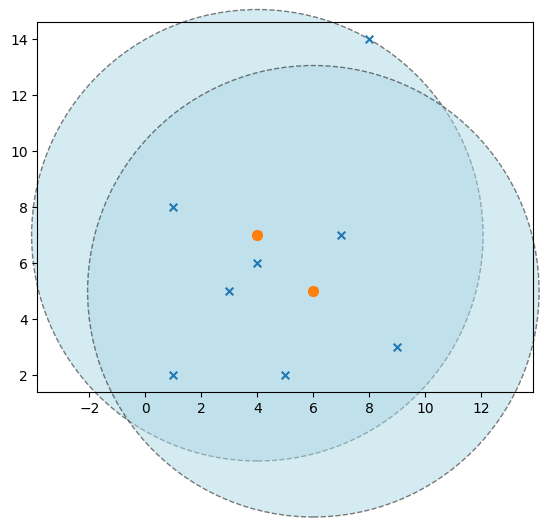

In [35]:
from math import sqrt
from matplotlib import pyplot as plt


def euclidean_distance(a, b):
    (xa, ya) = a
    (xb, yb) = b
    return sqrt( (xb - xa)**2 + (yb - ya)**2)

def calculate_R(coords, center_indices):
    n = len(coords)
    assert all( 0 <= j < n for j in center_indices)
    rj_values = [ min([euclidean_distance(xj, coords[j]) for j in center_indices]) for xj in coords]
    return max(rj_values)

def plot_coords(coords, center_indices):
    R = calculate_R(coords, center_indices)
    coords_x = [x for (x,y) in coords]
    coords_y = [y for (x, y) in coords]
    centers_x = [coords_x[j] for j in center_indices]
    centers_y = [coords_y[j] for j in center_indices]
    figure, axes = plt.subplots()
    axes.axis('equal')
    for k in center_indices:
        c = plt.Circle(coords[k], R, fill=True, alpha=0.5, facecolor='lightblue', clip_on=False, edgecolor='black', linewidth=1, linestyle='dashed')
        axes.add_artist(c)
    plt.scatter(coords_x, coords_y, s=30, marker='x' )
    plt.scatter(centers_x, centers_y, s=50, marker='o')
    plt.show()

coords = [(1,2), (3,5), (4,7), (8, 14), (9,3), (7,7), (6,5), (4, 6), (5,2), (1,8)]
center_indices = [2, 6] # remember indexing starts from 0 in python arrays
R = calculate_R(coords, center_indices)
print(f'R = {R}')
plot_coords(coords, center_indices)


However, if we instead chose centers: $P_2$ and $P_{6}$, we obtain a smaller $R = 7.071$.

R = 7.0710678118654755


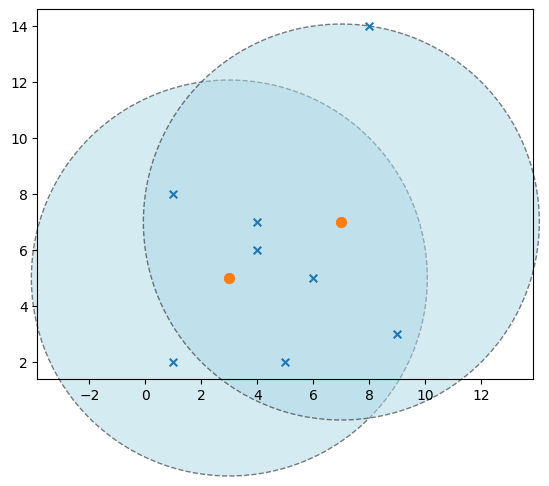

In [36]:
coords = [(1,2), (3,5), (4,7), (8, 14), (9,3), (7,7), (6,5), (4, 6), (5,2), (1,8)]
center_indices = [1, 5] # remember indexing starts from 0 in python arrays
R = calculate_R(coords, center_indices)
print(f'R = {R}')
plot_coords(coords, center_indices)

In the example above, we are asking which set of $k=2$ centers will yield the minimum radius $R$. 

## Solving the k-center problem

The k-center problem is well known to be NP-complete. The obvious algorithm of running through all possible $k$ combinations out of the given set of $n$ points has a complexity $O(n^k)$ which is exponential in $k$.

How do we solve the $k$-center problem in a greedy manner? Here is a simple algorithm:

<div class="alert alert-info" style=" border-width:2px;border-color:black white black white;">
    <ol>
        <li> $C = \{ P_1 \} $. <i> Just add the first point to the list of centers </i>
        <li> for j = 2 to k
            <ol>
                <li> $(P_j, r_j) = \mathit{find\_farthest\_point\_from\_current\_centers}( [P_1, \ldots, P_n], C ) $
                <li> $C = C \cup \{ P_j \}$
            </ol>  
        <li> $ (P_{k+1}, R) = \mathit{find\_farthest\_point\_from\_current\_centers}( [P_1, \ldots, P_n], C ) $
        <li> return set of centers $C$, radius $R$
    </ol>
</div>

The function $\mathit{find\_farthest\_point\_from\_current\_centers}$ goes over all points in the list and returns the point $P_j$ whose distance from its closest center $r_j$ is the maximum amongst all points. Although the function just needs to return this point $P_j$, we will also make it return $r_j$. Similarly the call to this function after the loop has finished is not needed but it will be useful to our analysis of this algorithm later on. 

In [40]:
from math import sqrt

def euclidean_distance(a, b):
    (xa, ya) = a
    (xb, yb) = b
    return sqrt((xb - xa)**2 + (yb - ya)**2)

def find_farthest_point_from_current_centers(coords, center_indices):
    n = len(coords)
    assert all(0 <= j < n for j in center_indices)
    rj_values = [(min([euclidean_distance(xi, coords[j]) for j in center_indices]), i) for (i, xi) in enumerate(coords)]
    (rj, j) = max(rj_values)
    return (j, rj)

def greedy_k_centers(coords, k, debug=True):
    centers = [0]  # Add the very first point
    if debug:
        print(f'Initial center: {coords[0]}')

    # Add k-1 more centers
    for i in range(1, k):
        j, rj = find_farthest_point_from_current_centers(coords, centers)
        centers.append(j)
        if debug:
            print(f'Added center {i}: {coords[j]} (distance: {rj:.3f})')

    # Find the final radius R
    _, R = find_farthest_point_from_current_centers(coords, centers)

    if debug:
        print(f'Final centers: {[coords[i] for i in centers]}')
        print(f'Final radius R: {R:.3f}')

    return centers, R

In [ ]:
# Example usage
coords = [(1,2), (3,5), (4,7), (8,14), (9,3), (7,7), (6,5), (4,6), (5,2), (1,8)]
print(sorted(coords))
k = 2

center_indices, radius = greedy_k_centers(coords, k)
print(f"\nFinal result:")
print(f"Center indices: {center_indices}")
print(f"Radius: {radius:.3f}")

Initial center: (1, 2)
Added center 1: (8, 14) (distance: 13.892)
Final centers: [(1, 2), (8, 14)]
Final radius R: 8.062


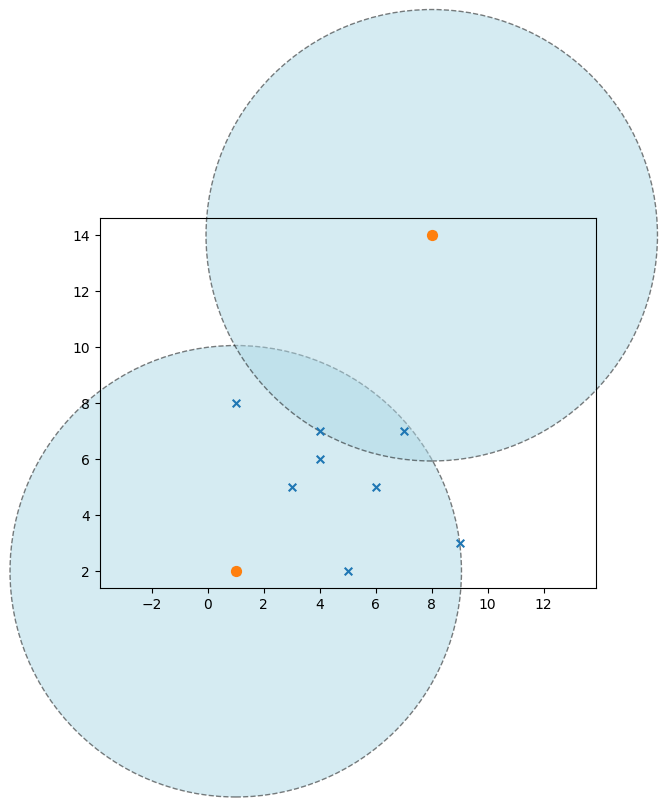

Passed test (5 points)


In [41]:
coords = [(1,2), (3,5), (4,7), (8, 14), (9,3), (7,7), (6,5), (4, 6), (5,2), (1,8)]
(center_indices, R) = greedy_k_centers(coords, 2)
plot_coords(coords, center_indices)
def calculate_R(coords, center_indices):
    n = len(coords)
    assert all( 0 <= j < n for j in center_indices)
    rj_values = [ min([euclidean_distance(xj, coords[j]) for j in center_indices]) for xj in coords]
    return max(rj_values)

assert len(center_indices) == 2
assert abs(R - calculate_R(coords, center_indices)) <= 1E-06, f'The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations'
assert 4 <= R <= 16.2
print('Passed test (5 points)')

Initial center: (1, 2)
Added center 1: (8, 14) (distance: 13.892)
Added center 2: (9, 3) (distance: 8.062)
Final centers: [(1, 2), (8, 14), (9, 3)]
Final radius R: 6.000


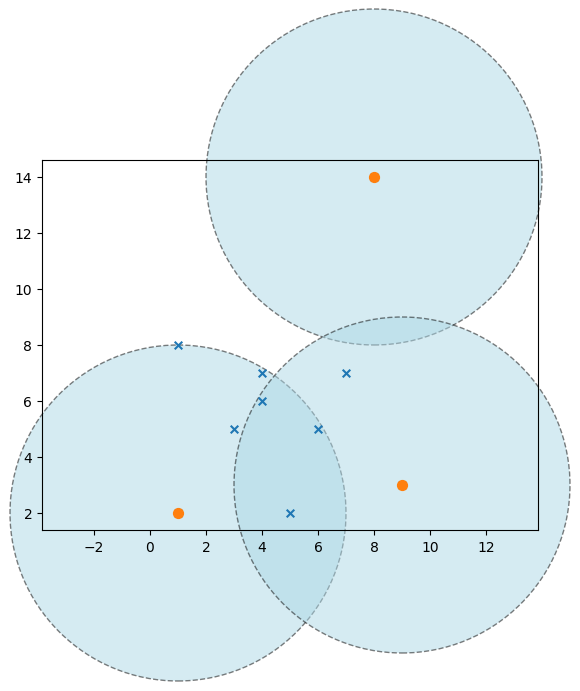

Passed test (5 points)


In [42]:
coords = [(1,2), (3,5), (4,7), (8, 14), (9,3), (7,7), (6,5), (4, 6), (5,2), (1,8)]
(center_indices, R) = greedy_k_centers(coords, 3)
plot_coords(coords, center_indices)
def calculate_R(coords, center_indices):
    n = len(coords)
    assert all( 0 <= j < n for j in center_indices)
    rj_values = [ min([euclidean_distance(xj, coords[j]) for j in center_indices]) for xj in coords]
    return max(rj_values)

assert len(center_indices) == 3
assert abs(R - calculate_R(coords, center_indices)) <= 1E-06, f'The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations'
assert 3 <= R <= 12.0
print('Passed test (5 points)')

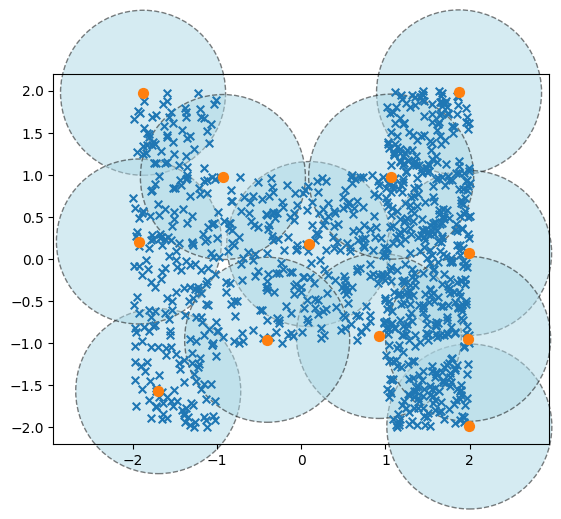

Test Passed (5 points)


In [43]:
from random import uniform
## Generate 1000 points
n = 1000
k = 12
coords = [(uniform(-2,-1), uniform(-2,2)) for i in range(n//4)] + [(uniform(-1,1), uniform(-1,1)) for i in range(n//4)] +  [(uniform(1,2), uniform(-2,0)) for i in range(n//4)] +  [(uniform(1,2), uniform(0,2)) for i in range(n//4)]

(center_indices, R) = greedy_k_centers(coords, k, debug=False)
plot_coords(coords, center_indices)
def calculate_R(coords, center_indices):
    n = len(coords)
    assert all( 0 <= j < n for j in center_indices)
    rj_values = [ min([euclidean_distance(xj, coords[j]) for j in center_indices]) for xj in coords]
    return max(rj_values)

assert len(center_indices) == k
assert abs(R - calculate_R(coords, center_indices)) <= 1E-06, f'The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations'
print('Test Passed (5 points)')

## Analysis

Let's recall the greedy algorithm again. 


1. $C = \{ P_1 \}$. *Just add the first point to the list of centers*
2. for j = 2 to k
    - $(C_j, r_j) = \mathit{find\_farthest\_point\_from\_current\_centers}( [P_1, \ldots, P_n], C )$
    - $C = C \cup \{ C_j \}$
3. $(P_{k+1}, R) = \mathit{find\_farthest\_point\_from\_current\_centers}( [P_1, \ldots, P_n], C )$
4. return set of centers $C$, radius $R$


Let $C_1, C_2, \ldots, C_k$ be the set of centers it returns and $P_{k+1}$ be the point returned by the call to $ \mathit{find\_farthest\_point\_from\_current\_centers}$ in line 3 of the algorithm. Note that $C_1 = P_1$ the way we have written the algorithm.


#### Question 1

How do the radii $r_2, \ldots, r_k$ obtained in the main for-loop of the algorithm and the final value $R$ compare with each other?



#### Q1 Answer

The relationship between these radii is:

$R \leq r_k \leq r_{k-1} \leq \ldots \leq r_3 \leq r_2$

Let's break down why this is the case:

1. In each iteration of the main loop (from j = 2 to k), the algorithm selects the point that is farthest from all current centers. This point becomes the new center, and its distance to the nearest existing center is $r_j$.

2. As we add more centers, the maximum distance from any point to its nearest center can only decrease or stay the same. It cannot increase because:
   - For points that were already close to a center, their distance remains unchanged.
   - For points that were far from existing centers, their distance might decrease if the new center is closer to them.

3. Therefore, each $r_j$ represents the maximum distance from any point to its nearest center at that stage of the algorithm. As we add more centers, this maximum distance can only decrease or remain the same.

4. The final value $R$ is calculated after all k centers have been chosen. It represents the maximum distance from any point to its nearest center among the final set of k centers.

5. $R$ is less than or equal to $r_k$ because:
   - If the point $P_{k+1}$ (used to calculate $R$) was already close to one of the k centers, $R$ might be equal to $r_k$.
   - If $P_{k+1}$ was far from existing centers but closer to one of the newly added centers (say, $C_j$ where j < k), then $R$ would be less than $r_k$.

In summary, the sequence of radii forms a non-increasing sequence:

$r_2 \geq r_3 \geq \ldots \geq r_k \geq R$

This property reflects the progressive improvement in clustering as more centers are added, with each new center potentially reducing the maximum distance from any point to its nearest center.


#### Question 2

Let us suppose the optimal algorithm chose centers $O_1, \ldots, O_k$ which yielded radius $R^*$. In other words every point can be found within $R^*$ circle around the centers $O_1, \ldots, O_k$. 

If we consider the points chosen by the greedy algorithm and the point $P_{k+1}$ generated after the $k$ centers are found, these $k+1$ points must also be covered by the $k$ optimal centers and the circles of radius $R^*$ around these. Therefore, by pigeon hole principle at least $2$ of the points in the set 
 $$ \{ C_1, \ldots, C_k, P_{k+1} \}$$ 
 must lie within the same circle centered around some optimal center $O_i$. 
 

 
 What is the farthest possible distance between any two points in a circle of radius $2 R^*$?

#### Q2 Answer

The farthest possible distance between any two points in a circle occurs when the two points are on opposite ends of a diameter of the circle. This distance is equal to the diameter of the circle.

Given:
- We have a circle of radius $R^*$
- We're asked about the farthest possible distance in a circle of radius $2R^*$

Let's calculate:

1) The diameter of a circle is twice its radius.

2) For a circle of radius $2R^*$, the diameter (and thus the maximum distance between any two points) would be:

   $\text{Maximum distance} = 2 * (2R^*) = 4R^*$

Therefore, the farthest possible distance between any two points in a circle of radius $2R^*$ is $4R^*$.

This result is important for the analysis of the greedy k-centers algorithm because:

1) We know that at least two of the points chosen by the greedy algorithm (including $P_{k+1}$) must lie within the same circle of radius $R^*$ centered at an optimal center.

2) These two points, being within the same $R^*$ circle, must be at most $2R^*$ apart from each other (as they could be on opposite sides of the $R^*$ circle).

3) This means that in the worst case, the greedy algorithm's solution is at most twice the optimal solution ($2R^*$), which leads to the 2-approximation guarantee of the greedy algorithm.

This geometric insight is crucial for proving the approximation ratio of the greedy k-centers algorithm.

#### Question 3

Suppose we take any two distinct points in the set $ \{ C_1, \ldots, C_k, P_{k+1} \}$. What can you say about the distance between them?

#### Q3 Answer

Consider any two distinct points in the set $ \{ C_1, \ldots, C_k, P_{k+1} \}$. We can make the following observations:

1) If both points are from $\{C_1, \ldots, C_k\}$:
   These are centers chosen by the greedy algorithm. Each center was chosen as the farthest point from all previously chosen centers at the time it was selected.

2) If one point is from $\{C_1, \ldots, C_k\}$ and the other is $P_{k+1}$:
   $P_{k+1}$ is the farthest point from all chosen centers after the algorithm has completed.

Now, let's consider the key property:

The distance between any two distinct points in this set is at least R.

Here's why:

1) For any two centers $C_i$ and $C_j$ (i < j):
   When $C_j$ was chosen, it was the farthest point from all previously chosen centers, including $C_i$. Therefore, the distance between $C_i$ and $C_j$ must be at least as large as the radius $r_j$ at that step. We know that $R \leq r_j$ (from our previous analysis), so the distance between $C_i$ and $C_j$ is at least R.

2) For any center $C_i$ and $P_{k+1}$:
   $P_{k+1}$ is, by definition, the farthest point from all chosen centers after the algorithm completes. The distance from $P_{k+1}$ to its nearest center is exactly R. Therefore, the distance between $C_i$ and $P_{k+1}$ must be at least R.

This property is crucial because it tells us that the greedy algorithm has spread out the centers (and $P_{k+1}$) in such a way that they are all at least R distance apart from each other.

In summary:
For any two distinct points A and B in the set $ \{ C_1, \ldots, C_k, P_{k+1} \}$, we can say:

$distance(A, B) \geq R$

This property is fundamental to proving the 2-approximation guarantee of the greedy algorithm, as it ensures that the algorithm has made a "good" choice of centers that are well-spread in relation to the final radius R.


#### Question 4

Show that the radius $R$ found by the greedy algorithm and the optimal radius $R^*$ must satisfy the inequality 
$ R^* \leq R \leq 2 R^* $. And therefore, the greedy algorithm is a factor $2$ approximation.


#### Q4 Answer

Certainly! Let's prove that the radius R found by the greedy algorithm and the optimal radius R* satisfy the inequality R* ≤ R ≤ 2R*. This proof will demonstrate that the greedy algorithm is a 2-approximation algorithm for the k-centers problem.

Proof:

1. First, let's prove R* ≤ R:
   - R* is the optimal radius, which means it's the smallest possible radius that can cover all points with k centers.
   - R is the radius found by our greedy algorithm.
   - Since R* is optimal, it must be less than or equal to any other valid solution, including R.
   - Therefore, R* ≤ R.

2. Now, let's prove R ≤ 2R*:
   
   a) Recall that in the optimal solution, all points (including C₁, ..., Cₖ, Pₖ₊₁) must be covered by k circles of radius R*.
   
   b) By the pigeonhole principle, at least two of these k+1 points must be in the same optimal circle (as we have k+1 points and only k optimal circles).
   
   c) Let's call these two points A and B. We know that:
      - distance(A, O) ≤ R*, where O is the center of the optimal circle containing A and B.
      - distance(B, O) ≤ R*
   
   d) By the triangle inequality:
      distance(A, B) ≤ distance(A, O) + distance(O, B) ≤ R* + R* = 2R*
   
   e) From our previous discussion, we know that for any two distinct points in {C₁, ..., Cₖ, Pₖ₊₁}, their distance is at least R.
   
   f) Therefore:
      R ≤ distance(A, B) ≤ 2R*

3. Combining the results from steps 1 and 2, we have:
   R* ≤ R ≤ 2R*

This proves that the greedy algorithm is a 2-approximation algorithm because:
- It always finds a solution (R) that is at most twice the optimal solution (R*).
- In the worst case, R = 2R*, but it can never be worse than this.
- The algorithm might find a better solution in some cases, but it's guaranteed to be no worse than twice the optimal.

Conclusion:
The greedy k-centers algorithm is guaranteed to find a solution that is at most twice the optimal solution. This 2-approximation guarantee is significant because:
1. It provides a bound on how far the greedy solution can be from the optimal solution.
2. It's achieved with a simple and efficient algorithm (O(nk) time complexity).
3. For an NP-hard problem like k-centers, having a polynomial-time algorithm with a constant approximation factor is valuable.

This approximation guarantee makes the greedy algorithm a practical and theoretically sound approach to solving the k-centers problem, especially for large datasets where finding the exact optimal solution would be computationally infeasible.


# Answers to Manually Graded Problems

### P1: Design a Greedy Algorithm

The pseudo code goes like this

<div class="alert alert-block alert-info" style="border-width:2px; border-color: black white black white ">
    <ol>
        <li> Start by assigning first $n/2$ nodes to $S_1$ and remaining to $S_2$ (or some arbitrary initial partition).
        <li> while <i> there exists an imbalanced node in partition $(S_1, S_2)$ </i> 
            <ol>
                <li> $v\ :=\ \textit{findImbalancedNode}(G, S_1, S_2) $
                <li> Flip the current partition that $v$ is in (i.e, if $v \in S_1$ then move $v$ to $S_2$ or vice-versa).
            </ol>
         <li> return $(S_1, S_2)$
    </ol>
</div>

The algorithm terminates because at each step, it moves when it moves an imbalanced node from one partition to another, the number of edges that are currently crossing the cut strictly increases. Since the maximum number of edges is limited by total number of edges in the graph, the algorithm must terminate. 

The time complexity of the algorithm is $ O(|E| \times (|V| + |E|))$. The greedy algorithm runs for at most $|E|$ steps and each iteration searches over the graph to find an imbalanced node. Obviously we can improve this with some better data-structures that can do the book keeping efficiently.
    
### P1: MaxCut, Q3. Approximation Guarantee

Suppose the partition has the property that no node is imbalanced. Then for every node, let $\text{ncut}(v)$ represent the number of edges incident on $v$ that cross the cut and $\delta(v)$ reprent the number of edges incident on $v$. We know that for all $v$, 

$$  \text{ncut}(v) \geq \frac{1}{2} \delta(v) $$

Summing over all nodes $v$, 

$$ \sum_{v \in V} \text{ncut}(v) \geq \frac{1}{2} \sum_{v \in V} \delta(v) $$

The LHS of the summation is twice the size of the cut because every edge $(u,v)$ is counted twice once as part of $\text{ncut}(u)$ and once more as part of $\text{ncut}(v)$. The RHS is the number of edges in the graph. Therefore, if $C$ is the size of the cut, we have

$$ 2  C \geq |E|,\ \text{or}\ C \geq \frac{1}{2} |E|$$

However, the optimal cut OPT cannot exceed $|E|$ in the first place. Hence we have

$$ \frac{1}{2} \text{OPT} \leq C \leq OPT $$


### P2: k-center, Q1

Note that each $r_j$ is the distance of the point in the list that is farthest from the current set of centers $C_1, \ldots, C_{j-1}$. Therefore, we have

$$r_2 \geq r_3 \geq \cdots \geq r_k \geq R $$

I.e, as the algorithm runs, each new center is closer to the previously generated set of centers.

### Q2

Answer $2 R^*$: two points along some diameter.

### Q3
Suppose we chose two points $C_i, C_j$ that are centers chosen by the greedy algorithm and $i < j$. We know that $C_j$ was the farthest points from any of the centers $C_1, \ldots, C_{j-1}$. Therefore, the distance between $C_i, C_j$ must be _at least_ $r_j$ and which is at least $R$.

Similarly if we chose points $C_i, P_{k+1}$ the same fact holds. Distance between the points must be _at least_ at least $R$.




### Q4

By pigeon hole principle at least two of the points in the set  $ \{ C_1, \ldots, C_k, P_{k+1} \}$ must lie inside a circle of radius $R^*$. However, any two points in the set must have a distance of at least $R$. Hence, 

$$ R \leq 2 R^* $$

Showing $R^* \leq R$ is obvious by assumption that $R^*$ is an optimal radius for the k-center problem and $R$ is some sub-optimal solution.